# Task 1 - Prediction using Supervised ML
---

* **Task:** Predict the percentage of a student based on the no. of study hours.
* **Libraries Used:** numpy, matplotlib, pandas, seaborn, scikit learn
* **Dataset Used:** Student Scores dataset

Task completed during Data Science & Business Analytics Internship @**THE SPARKS FOUNDATION** (GRIP) (July 2021)

Submitted By -
**Dayesh Bhure**

**Github Profile:** https://github.com/DayeshBhure

**LinkedIn Profile:** https://www.linkedin.com/in/dayesh-bhure

---

**Links:**

* **Dataset:** http://bit.ly/w-data
* **Github Repository:** https://git.io/JcXAZ
* **Youtube:** https://youtu.be/7D7WiaK1el8

---

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading the data

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

print("Data read successfully")

Data read successfully


In [3]:
# See the first 5 rows of the data

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**As there is no null values in the dataset, we can now visualize our data and see if we can manually find any relationship between the data.**

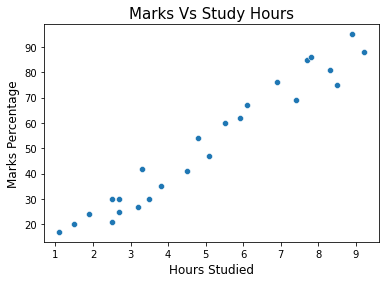

In [8]:
# Plotting the distribution of scores

sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=15)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above scatterplot, we can clearly see that there is a positive linear relation between the "Number of hours studied" and "Percentage of score".**

**Lets plot a regression line to confirm the correlation.**

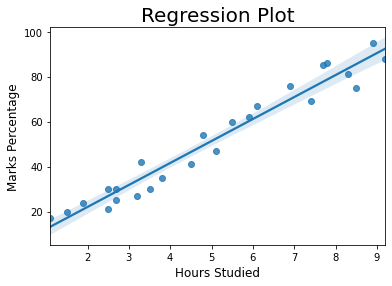

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
# Plotting the regression line
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Correlation
print(data.corr())

**From the above output it is confirmed that the variables are positively correlated.**

## **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
# X -> attributes || y -> labels

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.

In [11]:
# Splitting the data (Training & Test datasets)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

We have split the dataset as - 75% Training data and 25% Test data

## **Training the Model**

We will be using the Linear Regression which is a Supervised Machine Learning Algorithm.

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## **Making Predictions**

In [13]:
# Predicting the scores

y_pred = lr.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [14]:
df = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in y_pred]})
df 

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [15]:
# Comparing the Actual marks and the Predicted Marks

compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


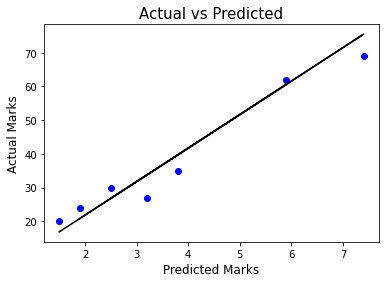

In [16]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=15)
plt.ylabel('Actual Marks', size=12)
plt.xlabel('Predicted Marks', size=12)
plt.show()

## **Evaluating the model**

In [17]:
from sklearn import metrics as m

print('Accuracy of Actual and Predicted Scores R-Squared is: ', m.r2_score(y_test, y_pred))

MSE = m.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = m.mean_absolute_error(y_test, y_pred)

print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)
print('Mean Absolute Error: ', MAE)

Accuracy of Actual and Predicted Scores R-Squared is:  0.9367661043365055
Mean Squared Error:  20.33292367497997
Root Mean Squared Error:  4.5092043283688055
Mean Absolute Error:  4.130879918502486


The accuracy is around 94% and the small value of error metrics indicates that the chances of error or wrong forecasting through the model are very less.

We can also predict the marks by giving the input of number of hours studied.

For example: What will be the predicted score of a student if he/she studies for 9.5 hrs/ day?

In [18]:
hours = [9.5]
answer = lr.predict([hours])
print('Score: {}'.format(round(answer[0],3)))

Score: 96.378


According to the regression model if a student studies for 9.5 hours a day he/she is likely to score 96.38 marks.

# ***-------------------------------------------------THE END-------------------------------------------------***